# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
import seaborn as sns


# Reading the data 

In [2]:
data=pd.read_csv("C:\\Users\\ASUS\\Desktop\\Courses-IITM\\ch5650\\Quiz\\Polymer.data",header=None)

In [8]:
drt=np.array(data)


(1314540, 1)

# Tidy up the dataset

In [9]:
arr_new = np.delete(drt,[range(0,1314540,109), range(1,1314540,109),range(2,1314540,109),
                         range(3,1314540,109),range(4,1314540,109),range(5,1314540,109), 
                          range(6,1314540,109),range(7,1314540,109),range(8,1314540,109)])


(1206000,)

In [10]:
dat=[]
for i in range(0,1206000):
    da=arr_new[i].split(" ")
    dat.append(da)

In [11]:
Data=pd.DataFrame(dat)


# Required Data

In [12]:
Data=Data.drop([0,1,2,6,7,8,9],axis=1)
Data

In [13]:
dat=np.array(Data)
dat=dat.reshape(12060,300)

In [14]:
Data.columns=["x","y","z"]
Data['x'] = pd.to_numeric(Data['x'],errors = 'coerce')
Data['y'] = pd.to_numeric(Data['y'],errors = 'coerce')
Data['z'] = pd.to_numeric(Data['z'],errors = 'coerce')



# PCA

In [53]:
pca = PCA(n_components = 2)
 
principalComponents= pca.fit_transform(Data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
principalDf

0         -1.624075
1         -3.229281
2          0.255770
3         -2.338818
4         -2.022219
             ...   
1205995   -0.974697
1205996    1.397147
1205997    1.613507
1205998    2.297091
1205999    3.147432
Name: principal component 2, Length: 1206000, dtype: float64

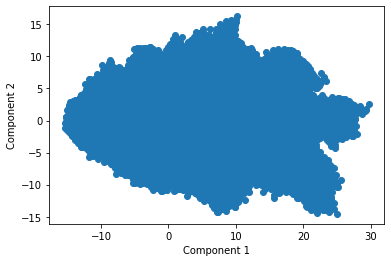

In [54]:
x=np.array(principalDf.iloc[:,0])
y=np.array(principalDf.iloc[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.scatter(x,y)

# Kernel PCA

In [22]:

Data_reshape=pd.DataFrame(dat)
Data_reshape

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-2.20243,-5.29512,-4.4049,-0.574106,-4.73233,-5.02726,-6.78421,-4.33292,-5.62459,-2.43637,...,-6.0832,-9.00123,-5.64206,-6.74807,-8.4009,-6.59056,-6.12753,-6.94776,-6.29786,-6.09497
1,-1.785,-5.64968,-5.08435,-0.444601,-5.20147,-5.17538,-6.08639,-4.80672,-5.49853,-2.31255,...,-5.77094,-8.78475,-6.17901,-6.54771,-8.75187,-7.60843,-5.69566,-6.9808,-5.59417,-5.36605
2,-2.71998,-6.36268,-5.05501,-1.82861,-5.03763,-5.71251,-6.50998,-3.68974,-4.21262,-1.98596,...,-5.20082,-9.28382,-6.53578,-5.63525,-9.22823,-7.965,-5.99084,-6.64429,-4.94194,-4.69566
3,-2.88735,-7.66943,-5.16378,-1.71509,-5.26339,-5.63451,-6.08733,-3.25552,-3.91928,-1.78564,...,-4.59964,-9.2115,-6.64044,-5.49961,-9.18224,-7.92595,-6.53587,-5.70287,-4.51689,-3.88017
4,-2.1655,-9.26297,-5.30298,-1.91775,-5.69765,-6.35435,-6.40865,-2.23192,-3.51107,-1.94179,...,-3.3656,-8.42255,-6.55924,-6.02235,-9.75842,-7.04083,-7.3203,-6.3789,-3.51498,-3.83486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,-22.4734,-15.074,-18.9985,-21.7767,-15.0048,-22.3328,-22.5449,-13.3507,-22.3141,-22.3394,...,-18.8874,-22.0067,-15.7503,-19.4613,-21.8221,-15.4879,-18.3966,-21.9775,-14.5259,-18.3052
12056,-22.1418,-15.0633,-19.5311,-22.2287,-15.1478,-22.3438,-22.2286,-13.8272,-21.9286,-22.8655,...,-18.9667,-21.8,-15.9069,-19.4003,-22.2359,-15.0115,-18.5557,-21.7888,-14.3418,-17.9322
12057,-21.5285,-15.1962,-18.7274,-22.3914,-15.0744,-22.4392,-22.469,-14.013,-22.054,-23.2793,...,-19.0226,-20.883,-15.8885,-18.5921,-22.4279,-14.7635,-18.4188,-21.6171,-14.8856,-17.8407
12058,-21.3121,-14.8368,-18.6916,-22.1587,-14.7453,-22.6243,-22.7021,-13.73,-22.3389,-23.0687,...,-18.7301,-20.9431,-15.6527,-18.3859,-21.9336,-14.7778,-18.0274,-21.9696,-14.3778,-17.173


In [30]:
kernel_pca=KernelPCA(n_components=2,kernel='rbf')

components=kernel_pca.fit_transform(Data_reshape)


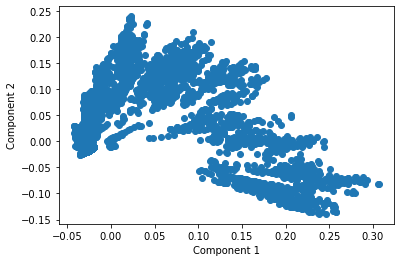

In [44]:

Df_kernelPCA = pd.DataFrame(data = components
             , columns = ['component 1', 'component 2'])

x=np.array(Df_kernelPCA.iloc[:,0])
y=np.array(Df_kernelPCA.iloc[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(x,y)

# Clustering

### Elbow Method

3 clusters seems to be good

Text(0, 0.5, 'WCSS')

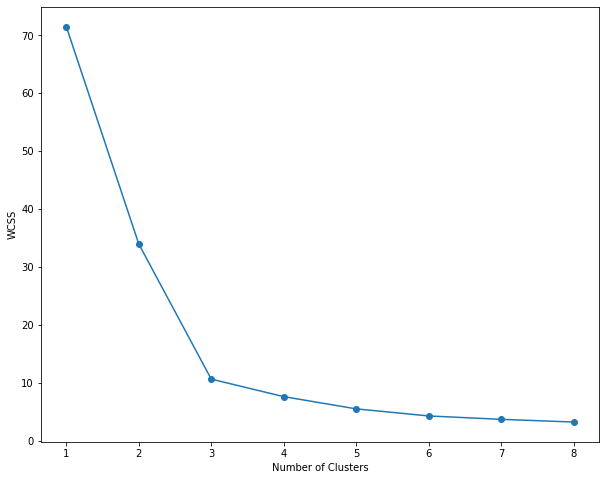

In [50]:
scores=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(Df_kernelPCA)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,9),scores,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [56]:
kmeans_pca=KMeans(n_clusters=3,init='k-means++',random_state=42)

In [57]:
kmeans_pca.fit(Df_kernelPCA)

KMeans(n_clusters=3, random_state=42)

In [58]:
Df_kernelPCA['kmeans_label']=kmeans_pca.labels_

C:\Users\ASUS\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Component 2')

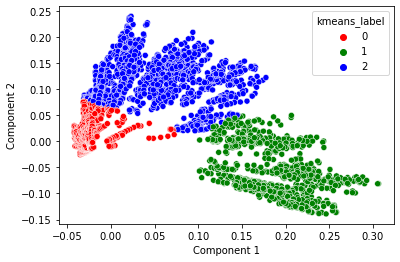

In [59]:

x=np.array(Df_kernelPCA.iloc[:,0])
y=np.array(Df_kernelPCA.iloc[:,1])

plot=sns.scatterplot(x,y,hue=Df_kernelPCA['kmeans_label'],palette=['r','g','b'])
plot.set_xlabel('Component 1')
plot.set_ylabel('Component 2')

# No of possible phases according to my analysis:3

In [1]:
import matplotlib.pyplot as plt
x=[1,2,3]
y=[1,2,3]


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

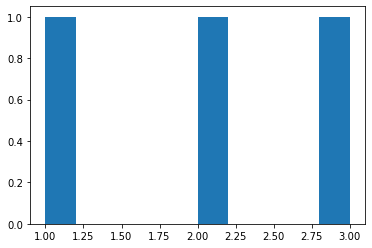

In [3]:
plt.hist(y)